# Nome: Lincoln Rodrigo Pereira de Melo
## 7o Semestre - Engenharia da Computação
## Projeto de Supercomputação VRP 

# Enunciado do projeto (Retirado do Arquivo do google colab):

## Projeto SuperComputação 2024.1

### Otimização de Rotas de Veículos (_Vehicle Routing Problem_ - VRP)

**Objetivo:**

Desenvolver uma aplicação em C++ que otimize as rotas de uma frota de veículos destinados à entrega de produtos a diversos clientes, buscando minimizar o custo total das rotas.


**Descrição:**

Você está encarregado de criar uma solução computacional para o problema de Otimização de Rotas de Veículos (VRP) para uma empresa de logística. A empresa possui uma frota de veículos que são usados para entregar produtos a uma série de clientes. Cada veículo tem uma capacidade de carga máxima, e cada cliente tem uma demanda específica que deve ser atendida. O objetivo é determinar as rotas ótimas para os veículos, de forma que todos os clientes sejam atendidos, respeitando as restrições de capacidade dos veículos, e minimizando o custo total das entregas.


**Restrições e Requisitos:**
1. **Capacidade dos Veículos:** Cada veículo tem uma capacidade máxima de carga que não pode ser excedida.
2. **Demanda dos Clientes:** Cada cliente tem uma demanda específica que deve ser completamente atendida por um único veículo.
3. **Custo da Rota:** Cada rota possui um custo, que simboliza o cômputo agregado da distância percorrida, do tempo de entrega, e do consumo de combustível. O objetivo é minimizar o custo total.
4. **Número máximo de visitas por rota:** Cada rota pode visitar um número máximo de cidades.
5. **Ponto de Partida e Chegada:** Todos os veículos começam e terminam suas rotas no depósito da empresa.


**Desafios Computacionais:**

- O VRP é um problema NP-difícil, o que significa que sua complexidade computacional cresce exponencialmente com o aumento do número de clientes e veículos.
- A busca exaustiva por todas as possíveis combinações de rotas torna-se impraticável para instâncias maiores do problema.


**Composição da Solução:**
1. Implementação de um algoritmo de _busca global_ para o problema (força bruta);
2. Implementação de alguma solução aproximada (_heurística_ ou _busca local_);
3. Implementação de 2 soluções paralelizadas, sendo:

  a. _Paralelização com Threads OpenMP_: Utilizar threads e a biblioteca OpenMP para paralelizar o algoritmo desenvolvido, com o objetivo de reduzir o tempo de execução. Analisar e implementar a paralelização de componentes do algoritmo que possam se beneficiar da execução concorrente, como a geração de soluções iniciais ou a busca local.

  b. _Paralelização e Distribuição do Processamento com MPI_: Implementar uma versão do algoritmo que utilize a interface de passagem de mensagens MPI para distribuir o processo de busca de soluções em múltiplos processos, possivelmente executando em diferentes nós de um cluster. A estratégia deve permitir a exploração paralela do espaço de soluções e a troca eficiente de informações entre os processos.



**Entregáveis:**

1. **Código Fonte:** Código fonte em C++ comentado e organizado.
2. **Relatório:** Um relatório descrevendo a abordagem utilizada, incluindo descrição das heurísticas e métodos de busca local, bem como as estratégias de paralelização adotadas.
3. **Análise de Desempenho:** Uma análise de desempenho da solução proposta, incluindo tempos de execução e qualidade das soluções encontradas, com base em instâncias de teste de diferentes tamanhos.
4. **Instruções de Uso:** Breve documentação sobre como compilar e executar a aplicação, incluindo exemplos de uso.


**DICA**:
Não deixe de estudar os exemplos deste link https://vrpy.readthedocs.io/en/master/examples.html, para entender como gerar a avaliar soluções para o problema. Compare sua solução com a solução desta biblioteca!

### Códigos dados para geração de entradas para o problema e como verificar as soluções do problema

##

### GERAÇÃO DE INSTÂNCIAS DO PROBLEMA

Execute o código abaixo algumas vezes gerando instâncias de tamanhos e complexidades distintas. Você deve experimentar alterações de:
- **num_nos**: número de cidades a serem visitados;
- **probabilidade**: a probabilidade de ser criada uma rota direta entre 2 cidades;


In [1]:
import random
# from networkx import set_node_attributes

def gerar_dicionario_demandas(N):
    """
    Gera um dicionário onde a chave é um int de 1 até N e o valor é um inteiro aleatório de 1 até 10.

    :param N: Número máximo para as chaves do dicionário.
    :return: Dicionário com chaves de 1 até N e valores inteiros aleatórios de 1 até 10.
    """
    return {i: random.randint(1, 10) for i in range(1, N)}


def gerar_entradas_grafo(num_nos, max_peso=100, probabilidade=0.25):
    """
    Gera um grafo para o problema de otimização de rotas de veículos.

    :param num_nos: Número de nós no grafo, incluindo o depósito.
    :param max_peso: Peso máximo para as arestas do grafo.
    :param probabilidade: Probabilidade de criar uma rota entre duas cidades.
    :return: Um dicionário representando o grafo onde as chaves são tuplas representando as arestas (nó1, nó2)
             e os valores são os pesos dessas arestas.
    """
    grafo = {}
    # Gerar pesos para arestas entre o depósito e outros nós
    for i in range(1, num_nos):
        grafo[(0, i)] = random.randint(1, max_peso)
        grafo[(i, 0)] = grafo[(0, i)]  # Assume que a distância de volta ao depósito é a mesma

    # Gerar pesos para arestas entre todos os outros pares de nós
    for i in range(1, num_nos+1):
        for j in range(i+1, num_nos):
            if random.random() > (1 - probabilidade):  # Verifica a probabilidade
                peso = random.randint(1, max_peso)
                grafo[(i, j)] = peso

    return grafo

############################################
#             Exemplo de uso
############################################
num_nos = 10                                   # Número total de nós incluindo o depósito
demandas = gerar_dicionario_demandas(num_nos)  # Gera as demandas para cada nó
grafo = gerar_entradas_grafo(num_nos)          # Gera o grafo que representa os locais e custos entre eles

# Salva o grafo em um arquivo TXT
# alterei aqui para salvar o arquivo no caminho correto
with open('grafos/grafo.txt', 'w') as arquivo:
  arquivo.write(str(num_nos) + "\n")    # Número de nós, incluindo depósito
  for local, demanda in demandas.items():
    linha = f"{local} {demanda}\n"      # Par LOCAL DEMANDA
    arquivo.write(linha)

  arquivo.write(str(len(grafo)) + "\n") # Número de arestas
  for aresta, peso in grafo.items():
    linha = f"{aresta[0]} {aresta[1]} {peso}\n" # Trio: ORIGEM DESTINO CUSTO
    arquivo.write(linha)


### GERAÇÃO DE SOLUÇÕES

Instale a biblioteca [VRPy](https://vrpy.readthedocs.io/en/latest/getting_started.html) para resolver problemas de otimização de rotas.

Para cada instância do problema gerada, execute este código para gerar a solução esperada.

Não deixe de estudar a documentação da biblioteca! Especialmente este link: https://vrpy.readthedocs.io/en/latest/examples.html#a-simple-example

Aqui você pode gerar soluções diferentes alterando:
- **load_capacity**: a quantidade e capacidade de veículos;
- **num_stops**: o número máximo de paradas numa rota;

In [2]:
!pip install vrpy

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [3]:
from networkx import DiGraph, set_node_attributes
from vrpy import VehicleRoutingProblem


def ler_arquivo_grafo(caminho_arquivo):
    with open(caminho_arquivo, 'r') as arquivo:
        # Lê o número de nós
        N = int(arquivo.readline().strip())-1

        # Lê as demandas dos nós
        demandas = {}
        for _ in range(N):
            linha = arquivo.readline().strip().split()
            id_no, demanda = int(linha[0]), int(linha[1])
            demandas[id_no] = demanda

        # Lê o número de arestas
        K = int(arquivo.readline().strip())

        # Lê as arestas
        arestas = []
        for _ in range(K):
            linha = arquivo.readline().strip().split()
            origem, destino, peso = int(linha[0]), int(linha[1]), int(linha[2])
            arestas.append((origem, destino, peso))

    return demandas, arestas

############################################
#             Usando a funcao
############################################
caminho_arquivo = 'grafo.txt'
demandas, arestas = ler_arquivo_grafo(caminho_arquivo)

G = DiGraph()
for inicio, fim, custo in arestas:
    if inicio==0: inicio="Source"
    if fim==0: fim="Sink"
    G.add_edge(inicio, fim, cost=custo)

set_node_attributes(G, values=demandas, name="demand")

prob = VehicleRoutingProblem(G, load_capacity=10)  # Pode alterar a capacidade
prob.num_stops = 5                                 # Pode alterar o número máximo de paradas
prob.solve()

INFO:vrpy.vrp:new upper bound : max num stops = 5
INFO:vrpy.vrp:Clarke & Wright solution found with value 550 and 6 vehicles
INFO:vrpy.vrp:Greedy solution found with value 793 and 8 vehicles
INFO:vrpy.vrp:iteration 0, 550.0
INFO:vrpy.vrp:iteration 1, 550.0
INFO:vrpy.vrp:iteration 2, 547.0
INFO:vrpy.vrp:iteration 3, 547.0
INFO:vrpy.master_solve_pulp:total cost = 547.0


In [4]:
prob.best_routes

{1: ['Source', 2, 'Sink'],
 2: ['Source', 5, 9, 'Sink'],
 3: ['Source', 6, 'Sink'],
 4: ['Source', 1, 8, 'Sink'],
 5: ['Source', 3, 'Sink'],
 6: ['Source', 7, 'Sink'],
 7: ['Source', 4, 'Sink']}

In [5]:
prob.best_value

547

In [6]:
prob.best_routes_load

{1: 4, 2: 4, 3: 4, 4: 8, 5: 10, 6: 8, 7: 2}

---

### Implementação da solução do problema

#### 1. Solução Global (Força Bruta)

In [7]:
%%writefile globalSearch.cpp
#include <iostream>
#include <vector>
#include <fstream>
#include <string>
#include <map>
#include <algorithm>
#include <climits>
#include <set>
#include <chrono>
#include <stack>
#include <iomanip> 

// utilizando o namespace std apenas para facilitar a leitura do código
using namespace std;
// classe grafo criada para facilitar as operações
class Grafo {
    // grafo_classe é um mapa que mapeia um vértice para uma lista de pares (vértice, peso)
    unordered_map<int, vector<pair<int, int>>> grafo_classe;

public:
    // Função para adicionar uma aresta ao grafo
    void adicionarAresta(int origem, int destino, int peso) {
        grafo_classe[origem].push_back(make_pair(destino, peso));
    }

    // função para calcular custo de uma rota
    int calcularCustoRota(const vector<int>& rota) {
        // copia da rota para adicionar o vértice 0 no início e no final
        vector<int> rota_copia = rota;
        rota_copia.push_back(0);
        rota_copia.insert(rota_copia.begin(), 0);
        int custo = 0;
        // percorre a rota e soma o custo de cada aresta
        for (int i = 0; i < rota_copia.size() - 1; i++) {
            int origem = rota_copia[i];
            int destino = rota_copia[i + 1];
            for (const auto& aresta : grafo_classe[origem]) {
                if (aresta.first == destino) {
                    custo += aresta.second;
                    break;
                }
            }
        }

        return custo;
    }

    // Função para verificar se uma rota é válida
    bool verificarRotaValida(const vector<int>& rota) {
        for (int i = 0; i < rota.size() - 1; i++) {
            int origem = rota[i];
            int destino = rota[i + 1];

            // Verifica se há uma aresta entre os vértices da rota
            if (grafo_classe.find(origem) == grafo_classe.end()) {
                return false;
            }

            bool arestaEncontrada = false;
            for (const auto& aresta : grafo_classe[origem]) {
                if (aresta.first == destino) {
                    arestaEncontrada = true;
                    break;
                }
            }
            if (!arestaEncontrada) {
                return false;
            }
        }

        return true;
    }
};

// declarando os construtores das funções
void LerGrafo(string file, map<int,int> &demanda, vector<tuple<int, int , int>> &arestas, vector<int> &locais, Grafo &grafo);
vector<vector<int>> GerarTodasAsCombinacoes(const vector<int> locais, map<int,int> demanda, int capacidade, Grafo &grafo);
bool VerificarCapacidade(vector<int> rota, map<int,int> demanda, int capacidade);
void encontrarMelhorCombinacao(const vector<vector<int>>& rotas, vector<vector<int>>& combinacaoAtual, int index, const vector<int>& locais, int& melhorCusto, vector<vector<int>>& melhorCombinacao, Grafo& grafo);


int main(int argc, char* argv[]){
    /*
    Recebe o nome do arquivo como argumento e chama a função LerGrafo para ler o arquivo e armazenar as informações 
    */
    // Inicia a contagem do tempo de execução utilizando a biblioteca chrono
    auto start = std::chrono::high_resolution_clock::now();
    // verifica se o nome do arquivo foi passado como argumento
    if (argc < 2) {
        cout << "Usage: " << argv[0] << " <file>" << endl;
        return 1;
    }
    string file = argv[1];
    // capacidade do veículo
    int capacidade = 10;
    // declaração das variáveis
    Grafo grafo;    
    map<int,int> demanda;
    vector<tuple<int, int , int>> arestas;
    vector<int> locais;
    // Realiza a leitura do grafo e armazena as informações nas variáveis declaras
    LerGrafo(file, demanda, arestas, locais, grafo);
    // Imprime o número de locais e o número de rotas possíveis
    cout << "Local: "  << locais.size() << endl;
    vector<vector<int>> rotas = GerarTodasAsCombinacoes(locais, demanda, capacidade, grafo);
    cout << "Rotas: " << rotas.size() << endl;
    // Inicializa o melhor custo com o maior valor possível
    int melhorCusto = INT_MAX;
    // Inicializa a melhor combinação de rotas
    vector<vector<int>> combinacaoAtual;
    vector<vector<int>> melhorCombinacao;
    // Encontra a melhor combinação de rotas
    encontrarMelhorCombinacao(rotas, combinacaoAtual, 0, locais, melhorCusto, melhorCombinacao, grafo);
    // Imprimir o resultado
    cout << "Melhor combinação de rotas:" << endl;
    for (const auto& rota : melhorCombinacao) {
        cout << "{ ";
        for (int cidade : rota) {
            cout << cidade << " ";
        }
        cout << "} com custo: " << grafo.calcularCustoRota(rota) << endl;
    }
    cout << "Custo total: " << melhorCusto << endl;


    // Calcula o tempo de execução
    auto end = std::chrono::high_resolution_clock::now();
    std::chrono::duration<double> duration = end - start;
    std::cout << "Tempo de execução: " << duration.count() << " segundos" << std::endl;
    // Escrever o tempo de execução em um arquivo
    std::ofstream outputFile("tempo_execucao_" + file + ".txt");
    if (outputFile.is_open()) {
        outputFile << "Tempo de execução: " << std::fixed << setprecision(3) << duration.count() << " segundos" << std::endl;
        outputFile.close();
    } else {
        std::cout << "Erro ao abrir o arquivo de saída" << std::endl;
    }
    return 0;
}


// Função para ler o grafo a partir de um arquivo
void LerGrafo(string file, map<int,int> &demanda, vector<tuple<int, int , int>> &arestas, vector<int> &locais, Grafo &grafo) {
    ifstream arquivo;
    arquivo.open(file);
    if (arquivo.is_open()) {
        int N; // número de locais a serem visitados
        arquivo >> N;
        N -= 1;
        for (int i = 1; i <= N; i++) {
            locais.push_back(i);
        }
        // Populando a lista de demandas dos locais
        for (int i = 0; i < N; i++) {
            int id_no, demanda_no;
            arquivo >> id_no;
            arquivo >> demanda_no;
            demanda[id_no] = demanda_no;
        }
        // número de arestas
        int K; // Declare a variável K antes de utilizá-la

        arquivo >> K; // Leia o número de arestas do arquivo

        for (int i = 0; i < K; i++) {
            int id_no1, id_no2, custo;
            arquivo >> id_no1;
            arquivo >> id_no2;
            arquivo >> custo;
            arestas.push_back(make_tuple(id_no1, id_no2, custo));
            grafo.adicionarAresta(id_no1, id_no2, custo);
        }
    }
    arquivo.close();
}

// Função para verificar se uma rota respeita a capacidade do veículo
bool VerificarCapacidade(vector<int> rota, map<int,int> demanda, int capacidade){
    int demanda_total = 0;
    for (auto& local : rota){
        demanda_total += demanda[local];
    }
    return demanda_total <= capacidade;
}

// Função para gerar todas as combinações possíveis
vector<vector<int>> GerarTodasAsCombinacoes(const vector<int> locais, map<int,int> demanda, int capacidade,Grafo &grafo) {
    vector<vector<int>> rotas;
    int n = locais.size();
    // Gera todas as combinações possíveis de rotas
    for (int i = 1; i < (1 << n); i++) {
        vector<int> rota;
        for (int j = 0; j < n; j++) {
            if (i & (1 << j)) {
                rota.push_back(locais[j]);
            }
        }
        // Para cada rota fazemos a verificação se é uma rota válida
        if (grafo.verificarRotaValida(rota)){
            // caso a rota seja válida, verificamos se a rota respeita a capacidade do veículo
            if (VerificarCapacidade(rota, demanda, capacidade)){
                rotas.push_back(rota);
            }
        }
    }
    return rotas;
}


// Função para verificar se uma combinação de rotas cobre todas as cidades
bool cobreTodasCidades(const vector<vector<int>>& combinacao, const vector<int>& locais) {
    set<int> cidadesCobertas;
    for (const auto& rota : combinacao) {
        for (int cidade : rota) {
            cidadesCobertas.insert(cidade);
        }
    }
    return cidadesCobertas.size() == locais.size();
}

// Função para encontrar a melhor combinação de rotas, essa é a função principal do algoritmo, que devolve a solução do problema
void encontrarMelhorCombinacao(const vector<vector<int>>& rotas, vector<vector<int>>& combinacaoAtual, int index, 
                               const vector<int>& locais, int& melhorCusto, vector<vector<int>>& melhorCombinacao, Grafo& grafo) {
    if (cobreTodasCidades(combinacaoAtual, locais)) {
        int custoTotal = 0;
        for (const auto& rota : combinacaoAtual) {
            custoTotal += grafo.calcularCustoRota(rota);
        }
        if (custoTotal < melhorCusto) {
            melhorCusto = custoTotal;
            melhorCombinacao = combinacaoAtual;
        }
        return;
    }

    if (index >= rotas.size()) {
        return;
    }

    // Incluir a rota atual na combinação
    combinacaoAtual.push_back(rotas[index]);
    encontrarMelhorCombinacao(rotas, combinacaoAtual, index + 1, locais, melhorCusto, melhorCombinacao, grafo);

    // Excluir a rota atual da combinação
    combinacaoAtual.pop_back();
    encontrarMelhorCombinacao(rotas, combinacaoAtual, index + 1, locais, melhorCusto, melhorCombinacao, grafo);
}


Overwriting globalSearch.cpp


#### 2. Solução Global com OpenMP (Força Bruta Paralelizada)

In [8]:
%%writefile globalSearchOpenMP.cpp

#include <iostream>
#include <vector>
#include <fstream>
#include <string>
#include <map>
#include <algorithm>
#include <climits>
#include <set>
#include <chrono>
#include <stack>
#include <unordered_map>
#include <omp.h>

using namespace std;

class Grafo {
    unordered_map<int, vector<pair<int, int>>> grafo_classe;

public:
    // Função para adicionar uma aresta ao grafo
    void adicionarAresta(int origem, int destino, int peso) {
        grafo_classe[origem].push_back(make_pair(destino, peso));
    }

    // função para calcular custo de uma rota
    int calcularCustoRota(const vector<int>& rota) {
        // copia de rota
        vector<int> rota_copia = rota;
        rota_copia.push_back(0);
        rota_copia.insert(rota_copia.begin(), 0);
        int custo = 0;
        for (int i = 0; i < rota_copia.size() - 1; i++) {
            int origem = rota_copia[i];
            int destino = rota_copia[i + 1];

            for (const auto& aresta : grafo_classe[origem]) {
                if (aresta.first == destino) {
                    custo += aresta.second;
                    break;
                }
            }
        }

        return custo;
    }

    // Função para verificar se uma rota é válida
    bool verificarRotaValida(const vector<int>& rota) {
        for (int i = 0; i < rota.size() - 1; i++) {
            int origem = rota[i];
            int destino = rota[i + 1];

            // Verifica se há uma aresta entre os vértices da rota
            if (grafo_classe.find(origem) == grafo_classe.end()) {
                return false;
            }

            bool arestaEncontrada = false;
            for (const auto& aresta : grafo_classe[origem]) {
                if (aresta.first == destino) {
                    arestaEncontrada = true;
                    break;
                }
            }

            if (!arestaEncontrada) {
                return false;
            }
        }

        return true;
    }
};

void LerGrafo(string file, map<int,int> &demanda, vector<tuple<int, int , int>> &arestas, vector<int> &locais, Grafo &grafo);
vector<vector<int>> GerarTodasAsCombinacoes(const vector<int> locais, map<int,int> demanda, int capacidade, Grafo &grafo);
bool VerificarCapacidade(vector<int> rota, map<int,int> demanda, int capacidade);
void encontrarMelhorCombinacao(const vector<vector<int>>& rotas, vector<vector<int>>& combinacaoAtual, int index, const vector<int>& locais, int& melhorCusto, vector<vector<int>>& melhorCombinacao, Grafo& grafo);


int main(int argc, char* argv[]){
    auto start = std::chrono::high_resolution_clock::now();
    if (argc < 2) {
        cout << "Usage: " << argv[0] << " <file>" << endl;
        return 1;
    }
    string file = argv[1];
    int capacidade = 10;
    Grafo grafo;    
    map<int,int> demanda;
    vector<tuple<int, int , int>> arestas;
    vector<int> locais;
    // Realiza a leitura do grafo
    LerGrafo(file, demanda, arestas, locais, grafo);

    cout << "Local: "  << locais.size() << endl;
    vector<vector<int>> rotas = GerarTodasAsCombinacoes(locais, demanda, capacidade, grafo);
    cout << "Rotas: " << rotas.size() << endl;

    int melhorCusto = INT_MAX;

    vector<vector<int>> combinacaoAtual;
    vector<vector<int>> melhorCombinacao;

    // Paralelizando a busca pela melhor combinação
    #pragma omp parallel
    {
        vector<vector<int>> melhorCombinacaoLocal;
        int melhorCustoLocal = INT_MAX;

        #pragma omp for schedule(dynamic)
        for (int i = 0; i < rotas.size(); i++) {
            vector<vector<int>> combinacaoAtualLocal;
            encontrarMelhorCombinacao(rotas, combinacaoAtualLocal, i, locais, melhorCustoLocal, melhorCombinacaoLocal, grafo);
        }

        #pragma omp critical
        {
            if (melhorCustoLocal < melhorCusto) {
                melhorCusto = melhorCustoLocal;
                melhorCombinacao = melhorCombinacaoLocal;
            }
        }
    }

    // Imprimir o resultado
    cout << "Melhor combinação de rotas:" << endl;
    for (const auto& rota : melhorCombinacao) {
        cout << "{ ";
        for (int cidade : rota) {
            cout << cidade << " ";
        }
        cout << "} com custo: " << grafo.calcularCustoRota(rota) << endl;
    }
    cout << "Menor custo: " << melhorCusto << endl;

    auto end = std::chrono::high_resolution_clock::now();
    std::chrono::duration<double> duration = end - start;
    std::cout << "Tempo de execução: " << duration.count() << " segundos" << std::endl;
    return 0;
}

void LerGrafo(string file, map<int,int> &demanda, vector<tuple<int, int , int>> &arestas, vector<int> &locais, Grafo &grafo) {
    ifstream arquivo;
    arquivo.open(file);
    if (arquivo.is_open()) {
        int N; // número de locais a serem visitados
        arquivo >> N;
        N -= 1;
        for (int i = 1; i <= N; i++) {
            locais.push_back(i);
        }
        // Populando a lista de demandas dos locais
        for (int i = 0; i < N; i++) {
            int id_no, demanda_no;
            arquivo >> id_no;
            arquivo >> demanda_no;
            demanda[id_no] = demanda_no;
        }
        // número de aresyas
        int K; // Declare a variável K antes de utilizá-la

        arquivo >> K; // Leia o número de arestas do arquivo

        for (int i = 0; i < K; i++) {
            int id_no1, id_no2, custo;
            arquivo >> id_no1;
            arquivo >> id_no2;
            arquivo >> custo;
            arestas.push_back(make_tuple(id_no1, id_no2, custo));
            grafo.adicionarAresta(id_no1, id_no2, custo);
        }
    }
    arquivo.close();
}

bool VerificarCapacidade(vector<int> rota, map<int,int> demanda, int capacidade){
    int demanda_total = 0;
    for (auto& local : rota){
        demanda_total += demanda[local];
    }
    return demanda_total <= capacidade;
}

// Função para gerar todas as combinações possíveis
vector<vector<int>> GerarTodasAsCombinacoes(const vector<int> locais, map<int,int> demanda, int capacidade,Grafo &grafo) {
    vector<vector<int>> rotas;
    int n = locais.size();
    for (int i = 1; i < (1 << n); i++) {
        vector<int> rota;
        for (int j = 0; j < n; j++) {
            if (i & (1 << j)) {
                rota.push_back(locais[j]);
            }
        }
        if (VerificarCapacidade(rota, demanda, capacidade)){
            if (grafo.verificarRotaValida(rota)){
                rotas.push_back(rota);
            }
        }
    }
    return rotas;
}


// Função para verificar se uma combinação de rotas cobre todas as cidades
bool cobreTodasCidades(const vector<vector<int>>& combinacao, const vector<int>& locais) {
    set<int> cidadesCobertas;
    for (const auto& rota : combinacao) {
        for (int cidade : rota) {
            cidadesCobertas.insert(cidade);
        }
    }
    return cidadesCobertas.size() == locais.size();
}

void encontrarMelhorCombinacao(const vector<vector<int>>& rotas, vector<vector<int>>& combinacaoAtual, int index, 
                               const vector<int>& locais, int& melhorCusto, vector<vector<int>>& melhorCombinacao, Grafo& grafo) {
    stack<pair<int, int>> pilha;
    pilha.push(make_pair(index, 0));

    while (!pilha.empty()) {
        pair<int, int> topo = pilha.top();
        pilha.pop();

        int i = topo.first;
        int opcao = topo.second;

        if (opcao == 0) {
            if (cobreTodasCidades(combinacaoAtual, locais)) {
                int custoTotal = 0;
                for (const auto& rota : combinacaoAtual) {
                    custoTotal += grafo.calcularCustoRota(rota);
                }
                if (custoTotal < melhorCusto) {
                    melhorCusto = custoTotal;
                    melhorCombinacao = combinacaoAtual;
                }
                continue;
            }
        }

        if (opcao == 0 && i < rotas.size()) {
            combinacaoAtual.push_back(rotas[i]);
            pilha.push(make_pair(i, 1));
            pilha.push(make_pair(i + 1, 0));
        } else if (opcao == 1) {
            combinacaoAtual.pop_back();
            pilha.push(make_pair(i + 1, 0));
        }
    }
}



Overwriting globalSearchOpenMP.cpp


Segue o arquivo .slurm que foi utilizado para rodar no cluster

```bash
#!/bin/bash
#SBATCH --nodes=1
#SBATCH --partition=espec
#SBATCH --mem=500M

export OMP_NUM_THREADS=4
./globalSearchOpenMP grafo.txt
```


8
8


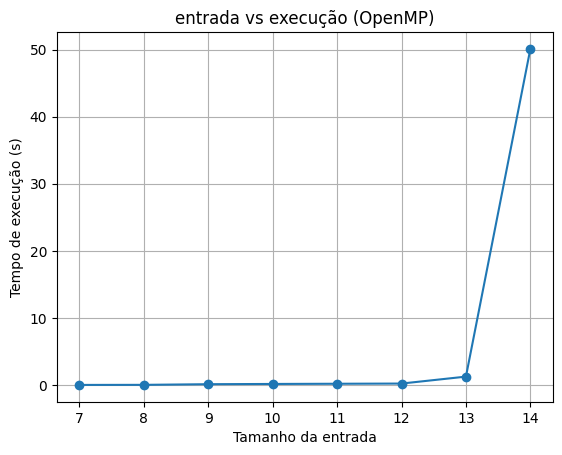

In [9]:
import matplotlib.pyplot as plt

# Define the number of inputs and the corresponding time taken
inputs = list(range(7, 15))
print(len(inputs))
# dados de tempo retiadados dos arquivos de output do cluster, como não pude ir novamente no Insper e quando estava lá o cluster ficou inativo, apenas tinha anotado os valores e não salvo o arquivo de todos os outputs
time_taken = [0.002, 0.013, 0.110, 0.146, 0.176, 0.205, 1.240, 50.107]
print(len(time_taken))
# Create the graph
plt.plot(inputs, time_taken, marker='o')
plt.xlabel('Tamanho da entrada')
plt.ylabel('Tempo de execução (s)')
plt.title('entrada vs execução (OpenMP)')
plt.grid(True)
# Display the graph
plt.show()

Todas as entradas foram geradas pelo código acima que foi fornecido, pelo o que pude analisar e observar, como o código para gerar as entradas envolve probabilidades, a maioria das vezes ele estava acabando por gerar entradas com uma complexidade bem menor, o que se traduz nesse gráfico parecendo que está colado em zero. Podemos ver no código que foi  valores próximos, crescendo levemente com a entrada, porém na entrada com 14 cidades veio mais devido a probabilidade o que levou um tempo de execução bem maior, por volta do uns 50 segundos. O código sequencial padrão demorou entre 96 a 100 segundos.

#### 3. Solução Global com MPI (Força Bruta Paralelizada entre máquinas)

In [10]:
%%writefile globalSearchMPI.cpp

#include <iostream>
#include <vector>
#include <fstream>
#include <string>
#include <map>
#include <algorithm>
#include <climits>
#include <set>
#include <chrono>
#include <stack>
#include <iomanip>
#include <mpi.h>
#include <unordered_map>

using namespace std;

class Grafo {
    unordered_map<int, vector<pair<int, int>>> grafo_classe;

public:
    void adicionarAresta(int origem, int destino, int peso) {
        grafo_classe[origem].push_back(make_pair(destino, peso));
    }

    int calcularCustoRota(const vector<int>& rota) {
        vector<int> rota_copia = rota;
        rota_copia.push_back(0);
        rota_copia.insert(rota_copia.begin(), 0);
        int custo = 0;
        for (int i = 0; i < rota_copia.size() - 1; i++) {
            int origem = rota_copia[i];
            int destino = rota_copia[i + 1];
            for (const auto& aresta : grafo_classe[origem]) {
                if (aresta.first == destino) {
                    custo += aresta.second;
                    break;
                }
            }
        }
        return custo;
    }

    bool verificarRotaValida(const vector<int>& rota) {
        for (int i = 0; i < rota.size() - 1; i++) {
            int origem = rota[i];
            int destino = rota[i + 1];
            if (grafo_classe.find(origem) == grafo_classe.end()) {
                return false;
            }
            bool arestaEncontrada = false;
            for (const auto& aresta : grafo_classe[origem]) {
                if (aresta.first == destino) {
                    arestaEncontrada = true;
                    break;
                }
            }
            if (!arestaEncontrada) {
                return false;
            }
        }
        return true;
    }
};

void LerGrafo(string file, map<int,int> &demanda, vector<tuple<int, int , int>> &arestas, vector<int> &locais, Grafo &grafo);
vector<vector<int>> GerarTodasAsCombinacoes(const vector<int> locais, map<int,int> demanda, int capacidade, Grafo &grafo);
bool VerificarCapacidade(vector<int> rota, map<int,int> demanda, int capacidade);
void encontrarMelhorCombinacao(const vector<vector<int>>& rotas, vector<vector<int>>& combinacaoAtual, int index, const vector<int>& locais, int& melhorCusto, vector<vector<int>>& melhorCombinacao, Grafo& grafo);
bool cobreTodasCidades(const vector<vector<int>>& combinacao, const vector<int>& locais);

int main(int argc, char* argv[]){
    // Agora utilizando MPI temos que fazer as devidas preparações para o seu uso
    MPI_Init(&argc, &argv);

    int rank, size;
    MPI_Comm_rank(MPI_COMM_WORLD, &rank);
    MPI_Comm_size(MPI_COMM_WORLD, &size);

    auto start = std::chrono::high_resolution_clock::now();

    if (argc < 2) {
        cout << "Usage: " << argv[0] << " <file>" << endl;
        MPI_Finalize();
        return 1;
    }
    string file = argv[1];
    int capacidade = 10;
    Grafo grafo;    
    map<int,int> demanda;
    vector<tuple<int, int , int>> arestas;
    vector<int> locais;

    LerGrafo(file, demanda, arestas, locais, grafo);
    if (rank == 0) {
        cout << "Local: "  << locais.size() << endl;
    }
    vector<vector<int>> rotas = GerarTodasAsCombinacoes(locais, demanda, capacidade, grafo);
    if (rank == 0) {
        cout << "Rotas: " << rotas.size() << endl;
    }
    int melhorCustoGlobal = INT_MAX;
    vector<vector<int>> melhorCombinacaoGlobal;

    // como agora estamos utilizando MPI, precisamos dividir o trabalho entre os processos, lembrando que o rank 0 é o processo principal e size é o número total de processos
    int chunkSize = rotas.size() / size;
    int startIdx = rank * chunkSize;
    int endIdx;
    if (rank == size - 1) {
        endIdx = rotas.size();
    } else {
        endIdx = startIdx + chunkSize;
    }

    int melhorCustoLocal = INT_MAX;
    vector<vector<int>> melhorCombinacaoLocal;
    vector<vector<int>> combinacaoAtual;
    // então aqui estamos rodando a função de encontrar a melhor combinação para cada processo. Ou seja cada um dos proceoss está pegando um trecho do vetor de rotas
    encontrarMelhorCombinacao(rotas, combinacaoAtual, startIdx, locais, melhorCustoLocal, melhorCombinacaoLocal, grafo);

    if (rank != 0) {
        // se o processo for diferente do processo principal, então o processo deve enviar o seu melhor custo e a sua melhor combinação para o processo principal
        MPI_Send(&melhorCustoLocal, 1, MPI_INT, 0, 0, MPI_COMM_WORLD);
        int localSize = melhorCombinacaoLocal.size();
        MPI_Send(&localSize, 1, MPI_INT, 0, 0, MPI_COMM_WORLD);
        // e aqui estamos enviando a combinação de rotas

        for (const auto& rota : melhorCombinacaoLocal) {
            // para cada rota, enviamos o tamanho da rota e a rota em si
            int rotaSize = rota.size();
            MPI_Send(&rotaSize, 1, MPI_INT, 0, 0, MPI_COMM_WORLD);
            MPI_Send(rota.data(), rotaSize, MPI_INT, 0, 0, MPI_COMM_WORLD);
        }
    } else {
        // se o processo for o processo principal, então ele deve receber os resultados dos outros processos e comparar com o seu resultado
        melhorCustoGlobal = melhorCustoLocal;
        melhorCombinacaoGlobal = melhorCombinacaoLocal;
        for (int i = 1; i < size; i++) {
            // recebemos o melhor custo de cada processo
            int melhorCustoRecv;
            MPI_Recv(&melhorCustoRecv, 1, MPI_INT, i, 0, MPI_COMM_WORLD, MPI_STATUS_IGNORE);
            if (melhorCustoRecv < melhorCustoGlobal) {
                melhorCustoGlobal = melhorCustoRecv;
                int localSize;
                // recebemos o tamanho da combinação de rotas
                MPI_Recv(&localSize, 1, MPI_INT, i, 0, MPI_COMM_WORLD, MPI_STATUS_IGNORE);
                melhorCombinacaoGlobal.clear();
                for (int j = 0; j < localSize; j++) {
                    int rotaSize;
                    // recebemos o tamanho da rota
                    MPI_Recv(&rotaSize, 1, MPI_INT, i, 0, MPI_COMM_WORLD, MPI_STATUS_IGNORE);
                    // recebemos a rota
                    vector<int> rota(rotaSize);
                    MPI_Recv(rota.data(), rotaSize, MPI_INT, i, 0, MPI_COMM_WORLD, MPI_STATUS_IGNORE);
                    melhorCombinacaoGlobal.push_back(rota);
                }
            }
        }
    }

    if (rank == 0) {
        // para finalizar utilizamos o processo principal para imprimir o resultado final e o tempo de execução
        cout << "Melhor combinação de rotas:" << endl;
        for (const auto& rota : melhorCombinacaoGlobal) {
            cout << "{ ";
            for (int cidade : rota) {
                cout << cidade << " ";
            }
            cout << "} com custo: " << grafo.calcularCustoRota(rota) << endl;
        }
        cout << "Custo total: " << melhorCustoGlobal << endl;

        auto end = std::chrono::high_resolution_clock::now();
        std::chrono::duration<double> duration = end - start;
        std::cout << "Tempo de execução: " << duration.count() << " segundos" << std::endl;

        std::ofstream outputFile("tempo_execucao_" + file + ".txt");
        if (outputFile.is_open()) {
            outputFile << "Tempo de execução: " << std::fixed << setprecision(3) << duration.count() << " segundos" << std::endl;
            outputFile.close();
        } else {
            std::cout << "Erro ao abrir o arquivo de saída" << std::endl;
        }
    }

    MPI_Finalize();
    return 0;
}

void LerGrafo(string file, map<int,int> &demanda, vector<tuple<int, int , int>> &arestas, vector<int> &locais, Grafo &grafo) {
    ifstream arquivo;
    arquivo.open(file);
    if (arquivo.is_open()) {
        int N;
        arquivo >> N;
        N -= 1;
        for (int i = 1; i <= N; i++) {
            locais.push_back(i);
        }
        for (int i = 0; i < N; i++) {
            int id_no, demanda_no;
            arquivo >> id_no;
            arquivo >> demanda_no;
            demanda[id_no] = demanda_no;
        }
        int K;
        arquivo >> K;
        for (int i = 0; i < K; i++) {
            int id_no1, id_no2, custo;
            arquivo >> id_no1;
            arquivo >> id_no2;
            arquivo >> custo;
            arestas.push_back(make_tuple(id_no1, id_no2, custo));
            grafo.adicionarAresta(id_no1, id_no2, custo);
        }
    }
    arquivo.close();
}

bool VerificarCapacidade(vector<int> rota, map<int,int> demanda, int capacidade){
    int demanda_total = 0;
    for (auto& local : rota){
        demanda_total += demanda[local];
    }
    return demanda_total <= capacidade;
}

vector<vector<int>> GerarTodasAsCombinacoes(const vector<int> locais, map<int,int> demanda, int capacidade,Grafo &grafo) {
    vector<vector<int>> rotas;
    int n = locais.size();
    for (int i = 1; i < (1 << n); i++) {
        vector<int> rota;
        for (int j = 0; j < n; j++) {
            if (i & (1 << j)) {
                rota.push_back(locais[j]);
            }
        }
        if (grafo.verificarRotaValida(rota)){
            if (VerificarCapacidade(rota, demanda, capacidade)){
                rotas.push_back(rota);
            }
        }
    }
    return rotas;
}

bool cobreTodasCidades(const vector<vector<int>>& combinacao, const vector<int>& locais) {
    set<int> cidadesCobertas;
    for (const auto& rota : combinacao) {
        for (int cidade : rota) {
            cidadesCobertas.insert(cidade);
        }
    }
    return cidadesCobertas.size() == locais.size();
}

void encontrarMelhorCombinacao(const vector<vector<int>>& rotas, vector<vector<int>>& combinacaoAtual, int index, 
                               const vector<int>& locais, int& melhorCusto, vector<vector<int>>& melhorCombinacao, Grafo& grafo) {
    if (cobreTodasCidades(combinacaoAtual, locais)) {
        int custoTotal = 0;
        for (const auto& rota : combinacaoAtual) {
            custoTotal += grafo.calcularCustoRota(rota);
        }
        if (custoTotal < melhorCusto) {
            melhorCusto = custoTotal;
            melhorCombinacao = combinacaoAtual;
        }
        return;
    }

    if (index >= rotas.size()) {
        return;
    }

    combinacaoAtual.push_back(rotas[index]);
    encontrarMelhorCombinacao(rotas, combinacaoAtual, index + 1, locais, melhorCusto, melhorCombinacao, grafo);

    combinacaoAtual.pop_back();
    encontrarMelhorCombinacao(rotas, combinacaoAtual, index + 1, locais, melhorCusto, melhorCombinacao, grafo);
}


Writing globalSearchMPI.cpp


Segue o arquivo .slurm que foi utilizado para rodar no cluster
```bash
#!/bin/bash
#SBATCH --nodes=4
#SBATCH --cpus-per-task=5   
#SBATCH --partition=espec
#SBATCH --mem=500M

export OMP_NUM_THREADS=4
mpirun ./grafo.txt
```

8
8


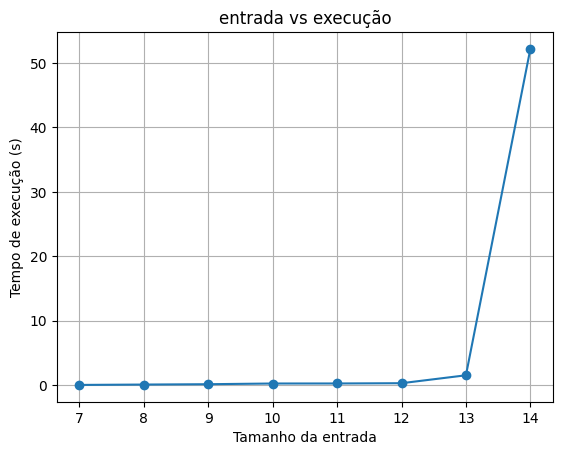

In [11]:
import matplotlib.pyplot as plt

# Define the number of inputs and the corresponding time taken
inputs = list(range(7, 15))
print(len(inputs))

# dados de tempo retiadados dos arquivos de output do cluster, como não pude ir novamente no Insper e quando estava lá o cluster ficou inativo, apenas tinha anotado os valores e não salvo o arquivo de todos os outputs
time_taken = [0.010, 0.067, 0.120, 0.230, 0.235, 0.276, 1.507, 52.205]

print(len(time_taken))
# Create the graph
plt.plot(inputs, time_taken, marker='o')
plt.xlabel('Tamanho da entrada')
plt.ylabel('Tempo de execução (s)')
plt.title('entrada vs execução')
plt.grid(True)
# Display the graph
plt.show()

Como estamos utilizando as mesmas entradas, a mesma justificativa se aplica para esse gráfico. Os valores estão levemente maiores , possivelmente devido ao overheading que o MPI tem por ser uma paralelização entre máquinas diferentes e não somente dentro de uma mesma máquina.

#### 4. Solução com Heurística Insert

Aqui segue a implementação com a Heuristica de Insert na qual ele vai para uma cidade e tenta ir para a próxima de menor custo se não retorna para o depósito e repete o processo. Essa implementação roda praticamente instantâneo pois não precisamos da função de gerar todas as possiveis rotas que uma implementação global/ por força bruta exige. Então, implementações com heuristicas são perfeitas para quando se quer uma resposta qualquer, que não seja a melhor possível.

In [12]:
%%writefile insertSearch.cpp

#include <iostream>
#include <vector>
#include <fstream>
#include <string>
#include <map>
#include <algorithm>
#include <climits>
#include <set>

using namespace std;

class Grafo {
    unordered_map<int, vector<pair<int, int>>> grafo_classe;

public:
    // Função para adicionar uma aresta ao grafo
    void adicionarAresta(int origem, int destino, int peso) {
        grafo_classe[origem].push_back(make_pair(destino, peso));
    }

    // função para calcular custo de uma rota
    int calcularCustoRota(const vector<int>& rota) {
        // copia de rota
        vector<int> rota_copia = rota;
        rota_copia.push_back(0);
        rota_copia.insert(rota_copia.begin(), 0);
        int custo = 0;
        for (int i = 0; i < rota_copia.size() - 1; i++) {
            int origem = rota_copia[i];
            int destino = rota_copia[i + 1];

            for (const auto& aresta : grafo_classe[origem]) {
                if (aresta.first == destino) {
                    custo += aresta.second;
                    break;
                }
            }
        }

        return custo;
    }

    int calcularCustoRotaIsolado(const vector<int>& rota) {
        vector<int> rota_copia = rota;
        int custo = 0;
        for (int i = 0; i < rota_copia.size() - 1; i++) {
            int origem = rota_copia[i];
            int destino = rota_copia[i + 1];
            for (const auto& aresta : grafo_classe[origem]) {
                if (aresta.first == destino) {
                    custo += aresta.second;
                    break;
                }
            }
        }

        return custo;
    }


    // Função para verificar se uma rota é válida
    bool verificarRotaValida(const vector<int>& rota) {
        for (int i = 0; i < rota.size() - 1; i++) {
            int origem = rota[i];
            int destino = rota[i + 1];

            // Verifica se há uma aresta entre os vértices da rota
            if (grafo_classe.find(origem) == grafo_classe.end()) {
                return false;
            }

            bool arestaEncontrada = false;
            for (const auto& aresta : grafo_classe[origem]) {
                if (aresta.first == destino) {
                    arestaEncontrada = true;
                    break;
                }
            }

            if (!arestaEncontrada) {
                return false;
            }
        }

        return true;
    }
};

void LerGrafo(string file, map<int,int> &demanda, vector<tuple<int, int , int>> &arestas, vector<int> &locais, Grafo &grafo);
vector<vector<int>> GerarTodasAsCombinacoes(const vector<int> locais, map<int,int> demanda, int capacidade, Grafo &grafo);
bool VerificarCapacidade(vector<int> rota, map<int,int> demanda, int capacidade);
vector<int> insertMaisProximo( vector<int>& rotas , Grafo& grafo);

int main(int argc, char* argv[]){
    string file = argv[1];
    int capacidade = 15;
    Grafo grafo;    
    map<int,int> demanda;
    vector<tuple<int, int , int>> arestas;
    vector<int> locais;
    // Realiza a leitura do grafo
    LerGrafo(file, demanda, arestas, locais, grafo);

    cout << "Local: "  << locais.size() << endl;
    vector<vector<int>> rotas = GerarTodasAsCombinacoes(locais, demanda, capacidade, grafo);
    cout << "Rotas: " << rotas.size() << endl;
    int melhorCusto = INT_MAX;

    vector<int> melhorRota;
    melhorRota = insertMaisProximo(locais, grafo);
        // Imprimir o resultado
    cout << "Melhor Rotas:" << endl;
    for (const auto& rota : melhorRota) {
        cout  << rota << " ";
    }
    cout << " com custo: " << grafo.calcularCustoRota(melhorRota) << endl;

    return 0;
}

void LerGrafo(string file, map<int,int> &demanda, vector<tuple<int, int , int>> &arestas, vector<int> &locais, Grafo &grafo) {
    ifstream arquivo;
    arquivo.open(file);
    if (arquivo.is_open()) {
        int N; // número de locais a serem visitados
        arquivo >> N;
        N -= 1;
        for (int i = 1; i <= N; i++) {
            locais.push_back(i);
        }
        // Populando a lista de demandas dos locais
        for (int i = 0; i < N; i++) {
            int id_no, demanda_no;
            arquivo >> id_no;
            arquivo >> demanda_no;
            demanda[id_no] = demanda_no;
        }
        // número de aresyas
        int K; // Declare a variável K antes de utilizá-la

        arquivo >> K; // Leia o número de arestas do arquivo

        for (int i = 0; i < K; i++) {
            int id_no1, id_no2, custo;
            arquivo >> id_no1;
            arquivo >> id_no2;
            arquivo >> custo;
            arestas.push_back(make_tuple(id_no1, id_no2, custo));
            grafo.adicionarAresta(id_no1, id_no2, custo);
        }
    }
    arquivo.close();
}

bool VerificarCapacidade(vector<int> rota, map<int,int> demanda, int capacidade){
    int demanda_total = 0;
    for (auto& local : rota){
        demanda_total += demanda[local];
    }
    return demanda_total <= capacidade;
}

// Função para gerar todas as combinações possíveis
vector<vector<int>> GerarTodasAsCombinacoes(const vector<int> locais, map<int,int> demanda, int capacidade,Grafo &grafo) {
    vector<vector<int>> rotas;
    int n = locais.size();
    for (int i = 1; i < (1 << n); i++) {
        vector<int> rota;
        for (int j = 0; j < n; j++) {
            if (i & (1 << j)) {
                rota.push_back(locais[j]);
            }
        }
        if (VerificarCapacidade(rota, demanda, capacidade)){
            
            // rota.push_back(0);
            if (grafo.verificarRotaValida(rota)){
                rotas.push_back(rota);
            }
        }
    }
    return rotas;
}

// Função para gerar uma rota usando a heuristica de inserção da rota mais próxima
vector<int> insertMaisProximo( vector<int>& rotas , Grafo& grafo) {
    vector<int> rotaHeuristica;
    rotaHeuristica.push_back(0);
    rotas.push_back(0);


    int cidadeAtual = rotaHeuristica.back();
    // loop para encontrar a rota mais próxima, até passar por todas as cidades
    while (rotas.size() > 1) {
        cout << "Cidade Atual: " << cidadeAtual << endl;
        int cidadeMaisProxima = -1;
        int menorCusto = INT_MAX;
        // loop para encontrar a cidade mais próxima com o menor custo

        for (int local : rotas) {
            cout << "Local atual " << local << endl;
            vector<int> rotaAtual = {cidadeAtual, local};
            int custo = grafo.calcularCustoRotaIsolado(rotaAtual);
            cout << "Para a rotas: " << cidadeAtual << " -> " << local << " o custo é: " << custo << endl;
            if (custo == 0){
                custo = INT_MAX;
            }
            if (custo < menorCusto) {
                menorCusto = custo;
                cidadeMaisProxima = local;
                
            }
        }
        if (cidadeMaisProxima == -1){

        }
        cidadeAtual = cidadeMaisProxima;
        rotaHeuristica.push_back(cidadeMaisProxima);
        // remove a cidade da lista de cidades, para que não passe novamente por ela    
        if (cidadeMaisProxima != 0) {
            rotas.erase(find(rotas.begin(), rotas.end(), cidadeMaisProxima));
        }
    }

    rotaHeuristica.push_back(0);

    return rotaHeuristica;

    // return rota;
}



Writing insertSearch.cpp


### Conclusão

Destacando o caso da entrada com 14 cidades, que as implementações levaram mais tempo. Como foi dito:
* Implementação global levou cerca de 96 a 100 segundos para rodar 
* Implementação com OpenMP rodou em 50.107s
* Implementação com MPI rodou em 52.205s
* Implementação com Heurística de inserção instantâneo

Com isso, podemos concluir que a Busca Global realmente exige bastante poder computacional e com maiores entradas e entradas mais completas/complexas o tempo que um código pode levar é bastante elevada. Porém com a paralelização conseguimos diminuir bastante esse tempo, idealmente sendo algo próximo de tempo/n onde n seria o número de processos ativos. Como visto aqui as paralelizações resultaram em um ganho que mais ou menos metade do tempo. Então, se a busca é por uma solução que seja a solução ótima o caminho com paralelização é o melhor caminho que se pode escolher, pois chegar na solução ótima exige com que se passe por todas possíveis soluções. Mas, se a busca é por uma solução que seja válida, qualquer que seja, usar um algoritmo que segue uma heurística é o melhor caminho, pois ele não exige você passar por outras soluções e sim chegar e uma que seja aceita.


Sobre as implementações com paralelização elas sairam como esperada sim. Porém vimos que a com MPI demorou um pouco mais de tempo que a com OpenMP, porém o verdadeiro MPI aparece quando podemos utilizar todos os recursos das máquinas disponíveis, porém, espera-se ter um overheading maior pois estamos dividindo a informações entre máquinas, processadores, núcleos diferentes. Então quanto maior for essa entrada mais esse overheading da transferência dos dados será irrelevante perto do tamanho de demora de execução e do tempo economizado por utilizar essa técnica.